In [86]:
import pandas as pd
import numpy as np
import glob
import os

RESULT_DIR = "results"
csv_files = glob.glob(os.path.join(RESULT_DIR, "*_results.csv"))


def get_model_name(filename):
    return (
        os.path.basename(filename)
        .replace("_results.csv", "")
        .replace("_pretrain", "-pretrain")
    )

rows = []
for file in csv_files:
    model = get_model_name(file)
    df = pd.read_csv(file)
    # Tìm tên cột thời gian phù hợp
    time_col = (
        "time"
        if "time" in df.columns
        else ("infer_time" if "infer_time" in df.columns else None)
    )
    rows.append(
        {
            "Model": model,
            "Accuracy (acc)": np.mean(df["acc"]),
            "CER": np.mean(df["cer"]),
            "WER": np.mean(df["wer"]),
            "Levenshtein": np.mean(df["lev"]),
            "Inference time (s)": np.mean(df[time_col]) if time_col else np.nan,
        }
    )

compare_df = pd.DataFrame(rows)
# Sắp xếp theo Accuracy giảm dần cho đẹp
compare_df = compare_df.sort_values("Accuracy (acc)", ascending=False).reset_index(
    drop=True
)
compare_df

,Model,Accuracy (acc),CER,WER,Levenshtein,Inference time (s)
0,paddleocr,0.799,0.105971,0.169012,1.626,0.030270
1,vietocr-pretrain,0.738,0.131197,0.212617,2.083,0.069493
2,vintern,0.632,0.108646,0.329864,0.810,1.496049
3,trocr-pretrain,0.622,0.204982,0.265192,2.717,0.152617
4,cnntr_efficientNet,0.604,0.161712,0.395430,1.631,0.189624
5,cnntr_resnet,0.552,0.171279,0.437329,1.718,0.186404
6,essayocr,0.306,0.301948,0.694175,2.821,0.050800
7,vietocr,0.090,0.757980,0.913875,8.640,0.060010


In [87]:
compare_df.to_csv(
    "./results/summary_comparison.csv",
    index=False,
)

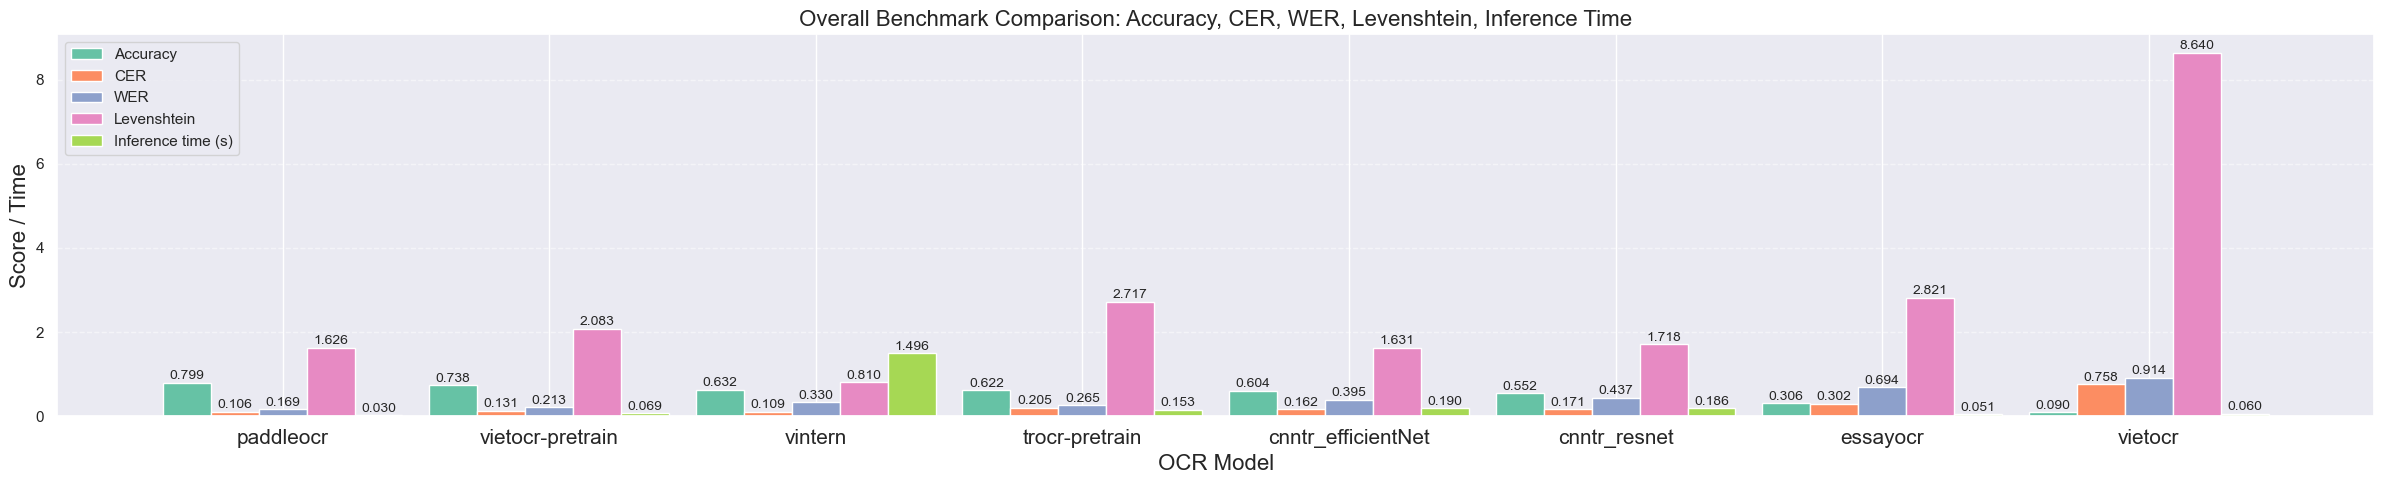

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and display names
metrics = ["acc", "cer", "wer", "lev", "infer_time"]
metric_labels = ["Accuracy", "CER", "WER", "Levenshtein", "Inference time (s)"]

n_models = len(df_metrics["model"])
n_metrics = len(metrics)
bar_width = 0.18
x = np.arange(n_models)

plt.figure(figsize=(24, 5))
for i, (metric, label) in enumerate(zip(metrics, metric_labels)):
    offset = (i - (n_metrics - 1) / 2) * bar_width
    values = df_metrics[metric].values
    bars = plt.bar(x + offset, values, width=bar_width, label=label)
    # Annotate value on each bar
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.01,
                f"{height:.3f}",
                ha="center",
                va="bottom",
                fontsize=10,
            )

plt.xticks(x, df_metrics["model"], fontsize=15)
plt.xlabel("OCR Model", fontsize=16)
plt.ylabel("Score / Time", fontsize=16)
plt.title(
    "Overall Benchmark Comparison: Accuracy, CER, WER, Levenshtein, Inference Time",
    fontsize=16,
)
plt.legend(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

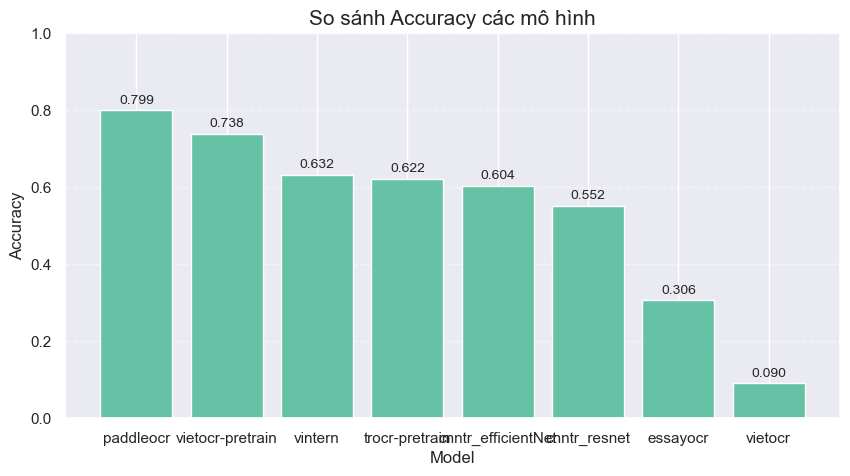

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(df_metrics["model"], df_metrics["acc"])
plt.title("So sánh Accuracy các mô hình", fontsize=15)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Thêm số liệu trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.01,
        f"{yval:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.show()

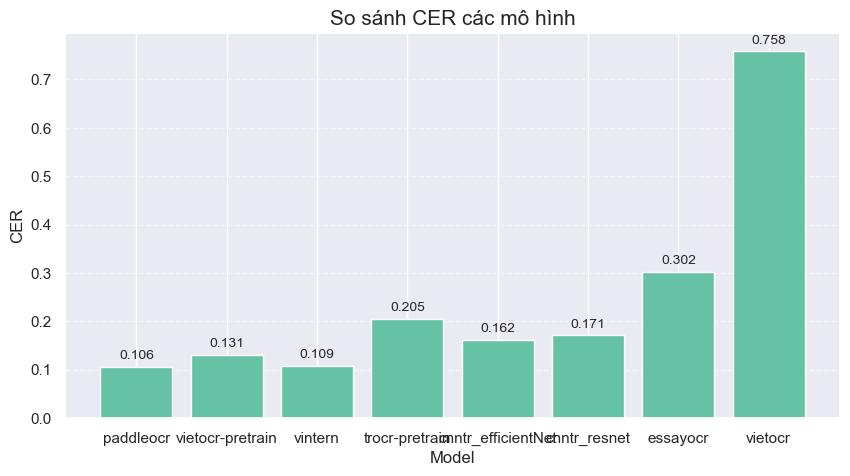

In [19]:
plt.figure(figsize=(10, 5))
bars = plt.bar(df_metrics["model"], df_metrics["cer"])
plt.title("So sánh CER các mô hình", fontsize=15)
plt.ylabel("CER")
plt.xlabel("Model")
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.01,
        f"{yval:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )
plt.show()

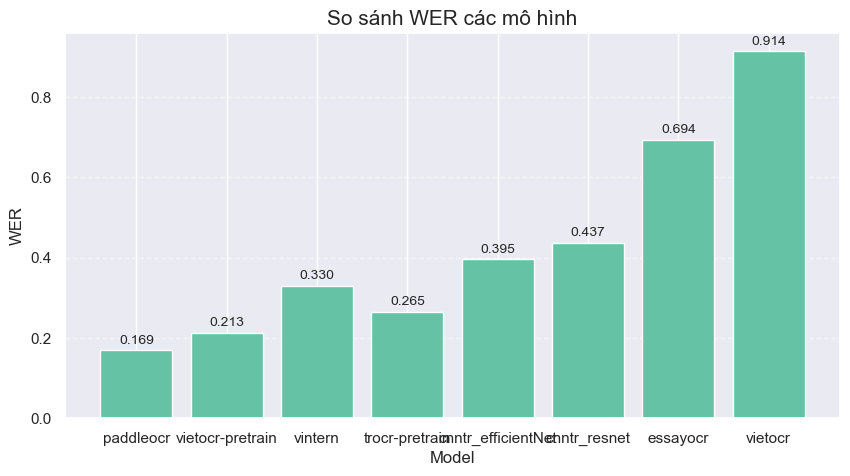

In [20]:
plt.figure(figsize=(10, 5))
bars = plt.bar(df_metrics["model"], df_metrics["wer"])
plt.title("So sánh WER các mô hình", fontsize=15)
plt.ylabel("WER")
plt.xlabel("Model")
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.01,
        f"{yval:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )
plt.show()

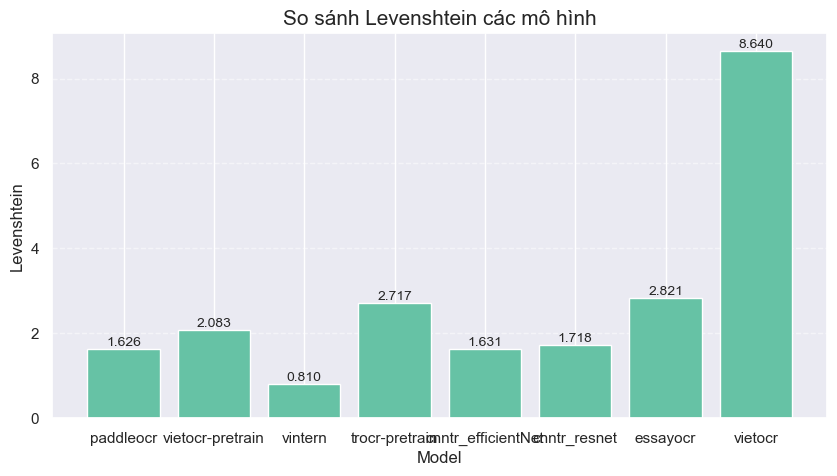

In [21]:
plt.figure(figsize=(10, 5))
bars = plt.bar(df_metrics["model"], df_metrics["lev"])
plt.title("So sánh Levenshtein các mô hình", fontsize=15)
plt.ylabel("Levenshtein")
plt.xlabel("Model")
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.01,
        f"{yval:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )
plt.show()

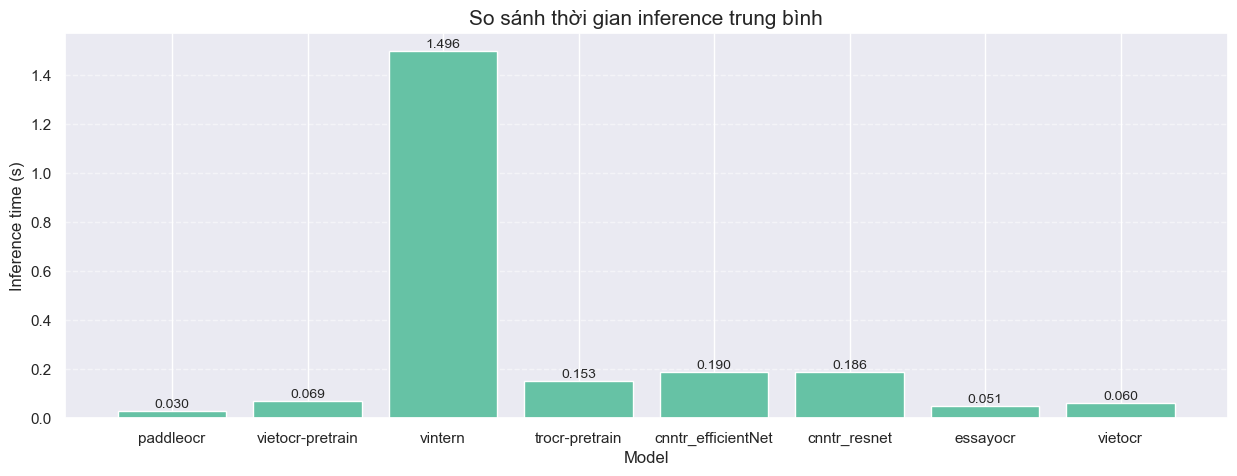

In [24]:
plt.figure(figsize=(15, 5))
bars = plt.bar(df_metrics["model"], df_metrics["infer_time"])
plt.title("So sánh thời gian inference trung bình", fontsize=15)
plt.ylabel("Inference time (s)")
plt.xlabel("Model")
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.001,
        f"{yval:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )
plt.show()